### **What is PCA?**
Imagine you have a huge box of crayons with dozens of different colors, but most of the time, you only really use a few of them to color a picture. PCA works similarly: It identifies the most important “colors” (or features) that explain most of the variance in your data, allowing you to focus on those while ignoring the rest.
- Too many features can make models harder to interpret or even lead to overfitting. PCA helps by reducing the number of features. 

### **How PCA Works (Simply)**
PCA will rotate and re-arrange your data to **line it up along the directions that have the most variation.** These new directions are called **principal components.** They are combinations of your original data but contain most of the data’s information.

PC1 is the direction in which your data varies the most. PC2 is the direction where there’s the second most variance, but perpendicular to the first.


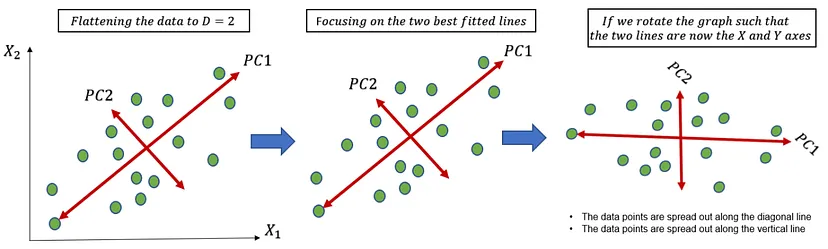


### **Eigenvalues and Eigenvectors:** In PCA, we use eigenvectors and eigenvalues to identify these new principal components.
- Eigenvectors are the directions (or axes) along which your data varies the most.
- Eigenvalues tell you how much variance (or information) each eigenvector carries.

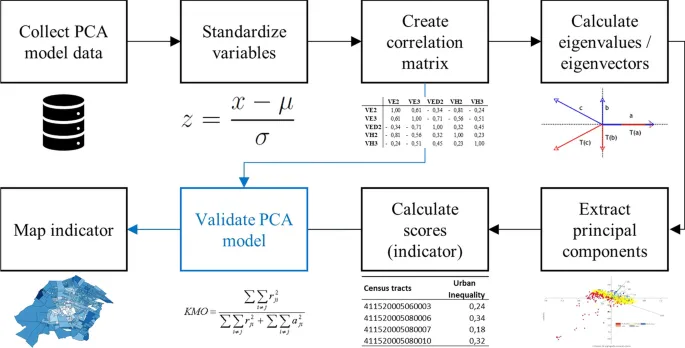

In [1]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)


Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']

First 5 samples:
Sample 1: [5.1 3.5 1.4 0.2], Target: setosa
Sample 2: [4.9 3.  1.4 0.2], Target: setosa
Sample 3: [4.7 3.2 1.3 0.2], Target: setosa
Sample 4: [4.6 3.1 1.5 0.2], Target: setosa
Sample 5: [5.  3.6 1.4 0.2], Target: setosa


C:\Users\40107588\AppData\Local\Temp\ipykernel_2856\708090380.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.get_cmap("viridis", 3), s=50)
C:\Users\40107588\AppData\Local\Temp\ipykernel_2856\708090380.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  scatter = ax2.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))


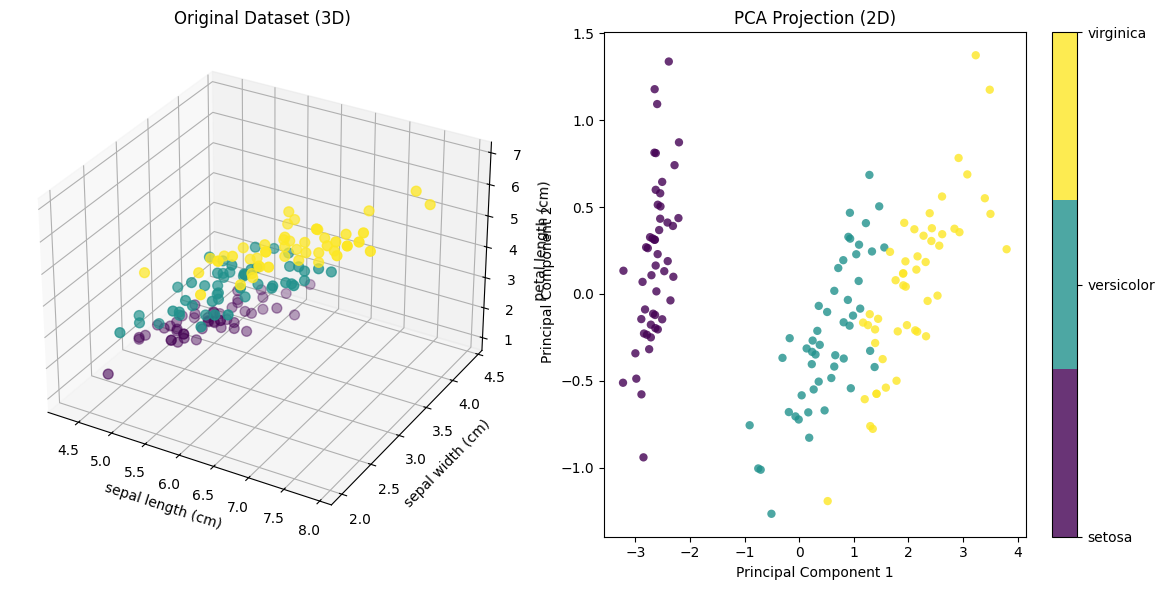

In [10]:
# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn import datasets
    from mpl_toolkits.mplot3d import Axes3D

    # Load Iris dataset
    data = datasets.load_iris()
    X = data.data
    y = data.target
    feature_names = data.feature_names
    target_names = data.target_names

    # Print dataset details
    print("Feature Names:", feature_names)
    print("Target Names:", target_names)
    print("\nFirst 5 samples:")
    for i in range(5):
        print(f"Sample {i+1}: {X[i]}, Target: {target_names[y[i]]}")

    # Plot original dataset in 3D using the first three features
    fig = plt.figure(figsize=(12, 6))

    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.get_cmap("viridis", 3), s=50)
    ax1.set_xlabel(feature_names[0])
    ax1.set_ylabel(feature_names[1])
    ax1.set_zlabel(feature_names[2])
    ax1.set_title("Original Dataset (3D)")

    # PCA
    from sklearn.decomposition import PCA
    pca = PCA(2)
    pca.fit(X)
    X_projected = pca.transform(X)

    # Plot PCA-transformed dataset
    ax2 = fig.add_subplot(122)
    x1 = X_projected[:, 0]
    x2 = X_projected[:, 1]
    scatter = ax2.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))
    ax2.set_xlabel("Principal Component 1")
    ax2.set_ylabel("Principal Component 2")
    ax2.set_title("PCA Projection (2D)")

    # Colorbar
    cbar = fig.colorbar(scatter, ax=ax2, ticks=[0, 1, 2])
    cbar.ax.set_yticklabels(target_names)

    plt.tight_layout()
    plt.show()
